In [32]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [33]:
folder = "../results/"
graphs = [
    "graph_7_nodes"
]

In [34]:
def get_df(graph):
    df = pd.read_csv(f"{folder}rank_effect_by_node_{graph}.csv")
    df['CVF (Avg)'] = df['CVF In (Avg)'] + df['CVF Out (Avg)']
    df['CVF (Max)'] = df['CVF In (Max)'] + df['CVF Out (Max)']
    return df

In [35]:
def plot_node_rank_effect(node, df, ax):
    sns.lineplot(data=df, x='Rank Effect', y='CVF (Avg)', ax=ax)
    ax.set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    ax.set_title("CVF Avg")
    ax.set_yscale('log')


def plot_node_rank_effect_max(node, df, ax):
    sns.lineplot(data=df, x='Rank Effect', y='CVF (Max)', ax=ax)
    ax.set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    ax.set_title("CVF Max")
    ax.set_yscale('log')

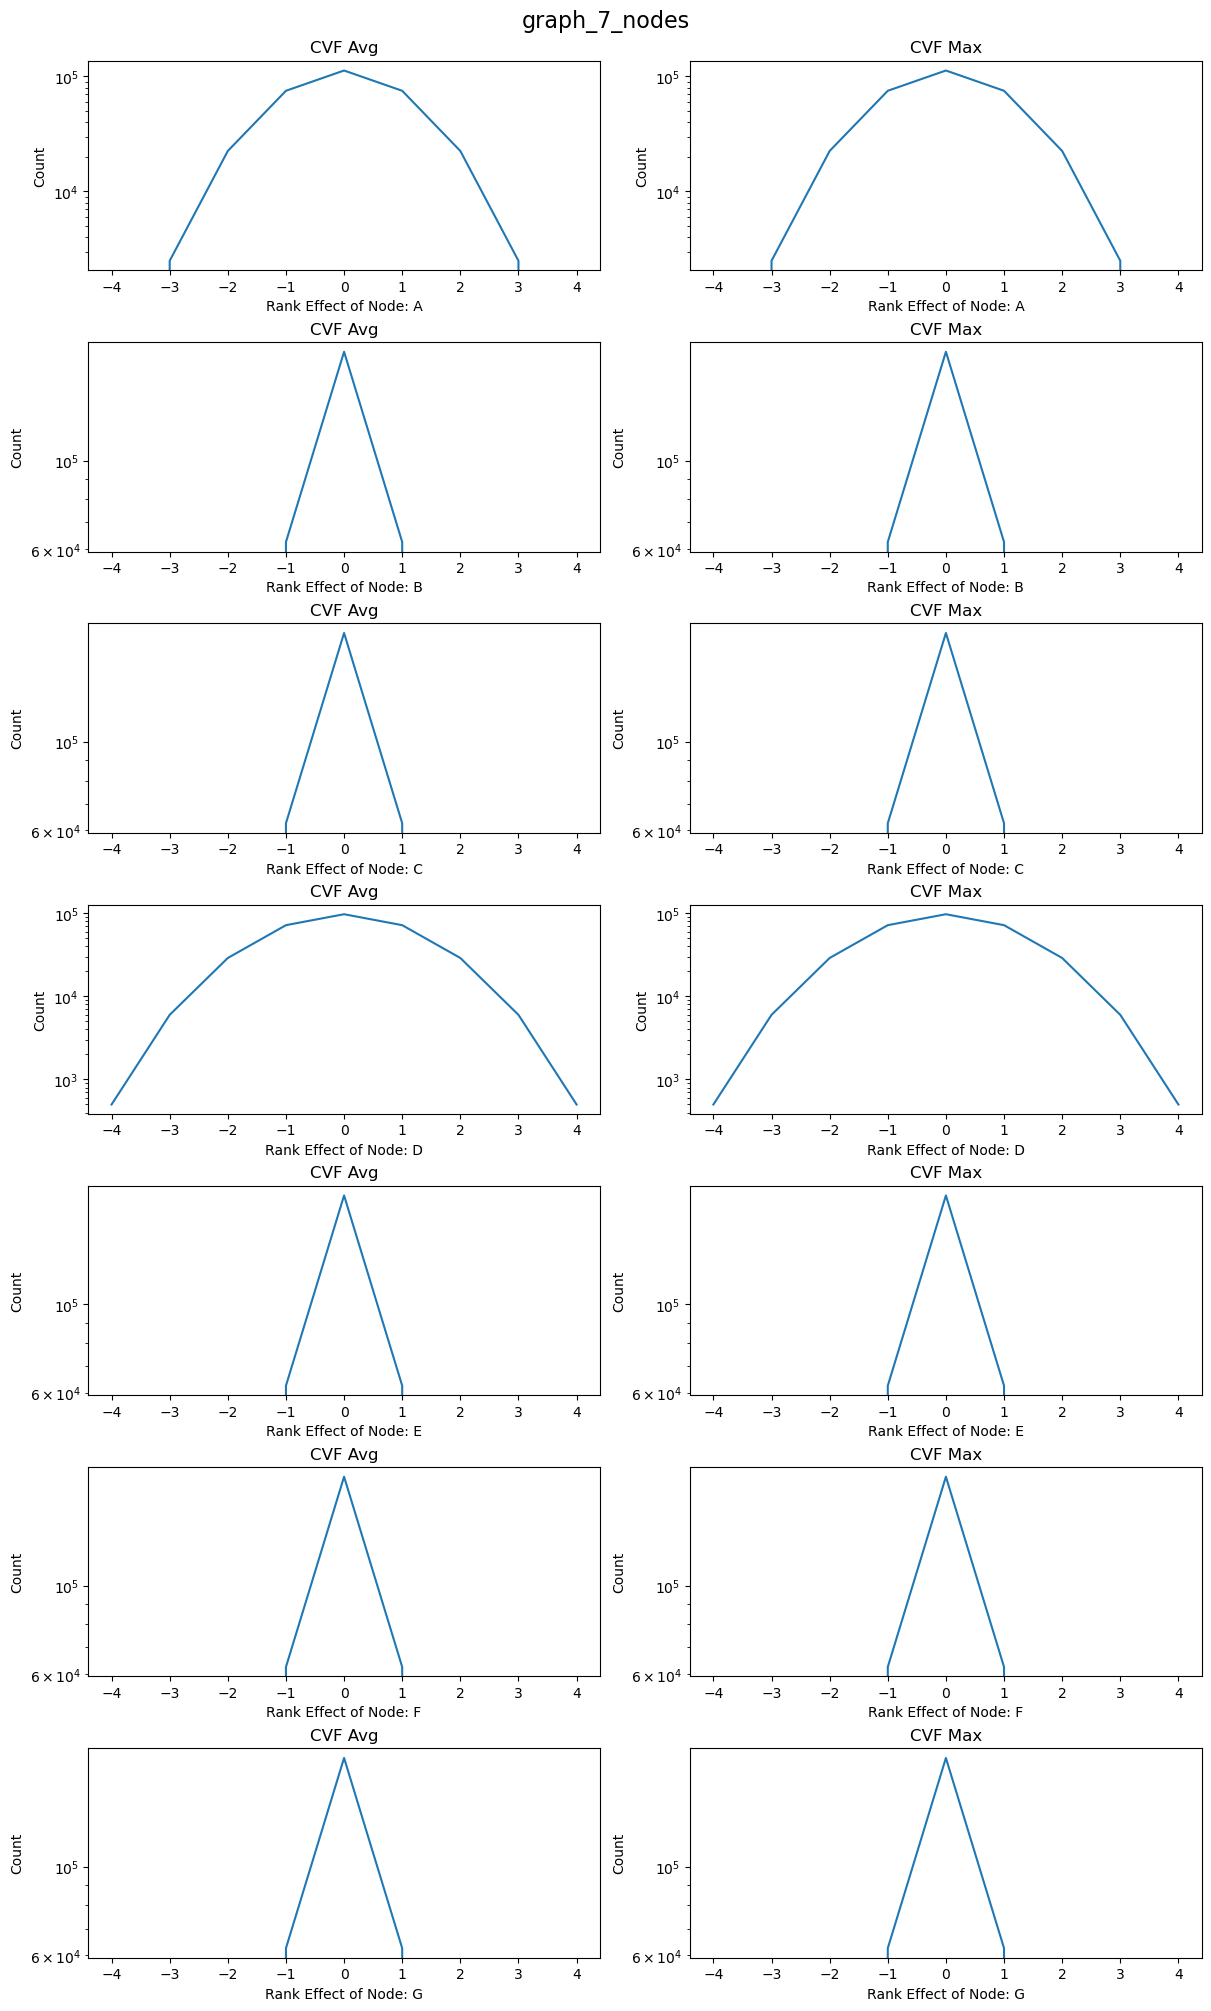

In [36]:
for graph in graphs:
    df = get_df(graph)
    node_grps = df.groupby(['Node'])
    fig, axs = plt.subplots(node_grps.ngroups, 2, figsize=(12, 20), constrained_layout=True)
    fig.suptitle(f'{graph}', fontsize=16)
    
    for i, (index, grp) in enumerate(node_grps):
        plot_node_rank_effect(index[0], grp, axs[i][0])
        plot_node_rank_effect_max(index[0], grp, axs[i][1])